# Automata Celular Bidimensional:

## A. Simulación ACB (Generación GIF):

- Estados Iniciales [-1 , 1].
- Implementación en **Combinación Random (1 combinación)**.

### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano, tamano), p=[0.4, 0.6])
    return estado_inicial_r

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def visualizar_automata(automata, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

# Ejemplo de uso
tamano = 10
generaciones = 60
estado_inicial = inicial_random(tamano)

automata = automata_celular(tamano, generaciones, estado_inicial)
## Generación visualización condicionada a cantidad de generaciones.
#visualizar_automata(automata, generaciones, tamano) 

### Creación Gif:

In [ ]:
import imageio

def crear_gif(automata, tamano, generaciones):
    nombre_archivo = f"BCA_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2) #con fps regulo la tasa de imagenes por segundo

In [ ]:
crear_gif(automata, tamano, generaciones)

_________

## B. Simulación ACB (Generación GIF): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**

### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata


def crear_gif(automata, tamano, generaciones, idx, directorio):
    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {t} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2)   # Con fps regulo la tasa de imágenes por segundo
    

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

directorio = f"BCA_s{tamano}_gen{generaciones}"
if not os.path.exists(directorio):
    os.makedirs(directorio)

for idx, estado in enumerate(estados):
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    crear_gif(automata, tamano, generaciones, idx, directorio)


__________

## C. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla Totalística (Estricta):
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

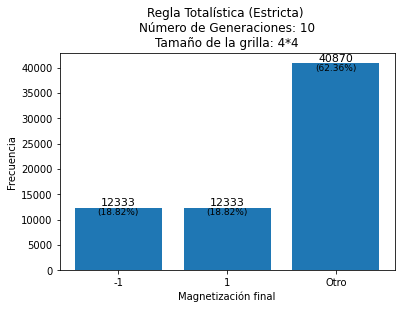

In [54]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla Totalística (Estricta) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

### Crear Tabla inicial contando:
En función de la Magnetización inicial, obtener los siguiente datos:
- Cantidad de Combinaciones que tienen esa magnetización inicial.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final = 1.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final = -1.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final != [-1, 1].
- Eficacia de Consenso: Cantidad de Combinaciones que obtienen un punto fijo [-1, 1], dado una determinada Magnetización Inicial.
- Eficacia de Clasificación: Cantidad de Combinaciones que obtienen un punto fijo [-1] O [1], pero que respetan la mayoría inicial.

In [55]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

### Sumar Cantidades para comparación:

In [56]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [4]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1780,0,40,0.978022,0.978022
5,-0.375,4368,3888,0,480,0.89011,0.89011
6,-0.25,8008,4608,0,3400,0.575425,0.575425
7,-0.125,11440,1360,0,10080,0.118881,0.118881
8,0.0,12870,0,0,12870,0.0,0.0
9,0.125,11440,0,1360,10080,0.118881,0.118881


### Generar Gráficos de Eficacia (Consenso y Clasificación):

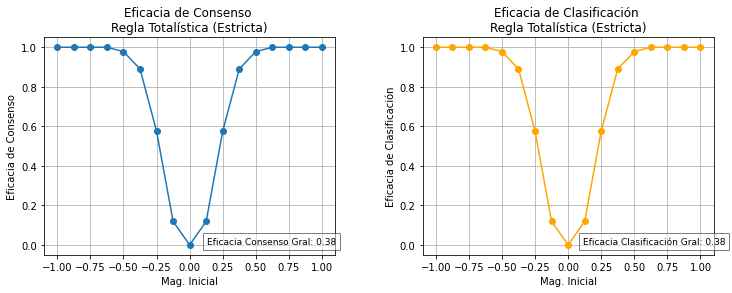

In [60]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla Totalística (Estricta)')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla Totalística (Estricta)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

________

## D. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 4 - Totalística:
- Si Fx (Suma Vecinos) = [4] entonces 1.
- E.O.C. entonces -1.

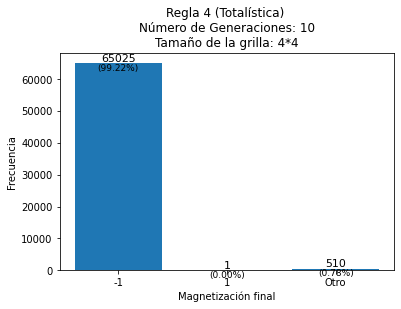

CPU times: user 93.8 ms, sys: 1.64 ms, total: 95.4 ms
Wall time: 32.4 ms


In [91]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == [4]:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 4 (Totalística) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

%time plt.show()

In [92]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [93]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [94]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1820,0,0,1.0,1.0
5,-0.375,4368,4368,0,0,1.0,1.0
6,-0.25,8008,8008,0,0,1.0,1.0
7,-0.125,11440,11440,0,0,1.0,1.0
8,0.0,12870,12868,0,2,0.999845,0.0
9,0.125,11440,11424,0,16,0.998601,0.0


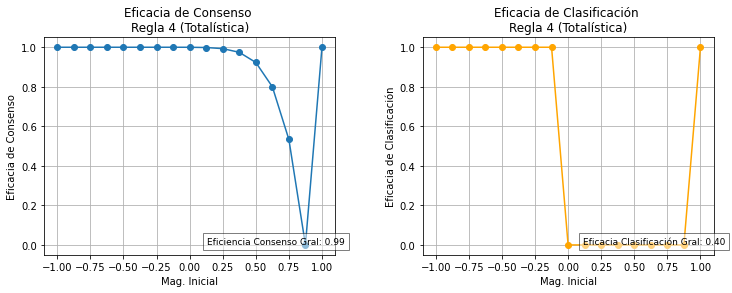

In [95]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 4 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 4 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_____

## E. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 24 - Totalística:
- Si Fx (Suma Vecinos) = [2, 4] entonces 1.
- E.O.C. entonces -1.

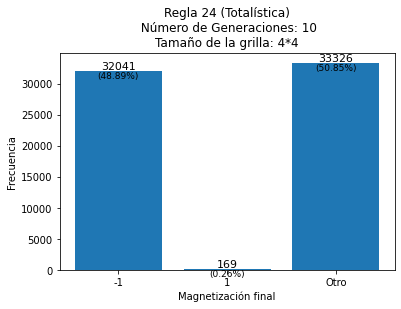

In [96]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 24 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [97]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [98]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [99]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1804,0,16,0.991209,0.991209
5,-0.375,4368,4176,0,192,0.956044,0.956044
6,-0.25,8008,6992,0,1016,0.873127,0.873127
7,-0.125,11440,8288,0,3152,0.724476,0.724476
8,0.0,12870,6532,0,6338,0.507537,0.0
9,0.125,11440,2976,0,8464,0.26014,0.0


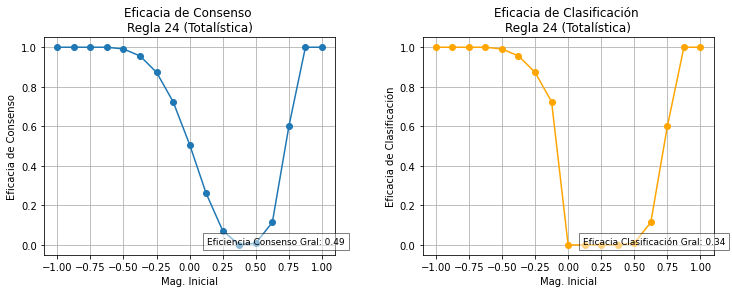

In [100]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 24 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 24 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## F. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 04 - Totalística:
- Si Fx (Suma Vecinos) = [0, 4] entonces 1.
- E.O.C. entonces -1.

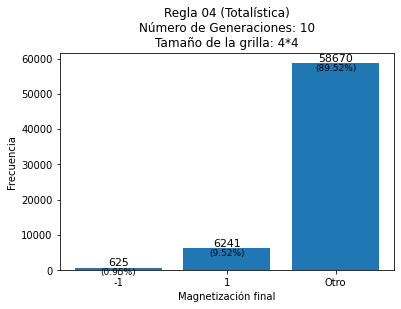

In [101]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 04 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [102]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [103]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [104]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,72,0,48,0.6,0.6
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,32,0,1788,0.017582,0.017582
5,-0.375,4368,128,0,4240,0.029304,0.029304
6,-0.25,8008,72,0,7936,0.008991,0.008991
7,-0.125,11440,64,0,11376,0.005594,0.005594
8,0.0,12870,96,2916,9858,0.234033,0.226573
9,0.125,11440,0,0,11440,0.0,0.0


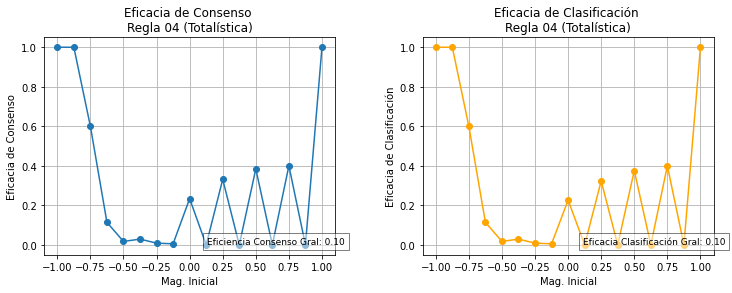

In [105]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 04 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 04 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## G. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 024 - Totalística:
- Si Fx (Suma Vecinos) = [0, 2, 4] entonces 1.
- E.O.C. entonces -1.

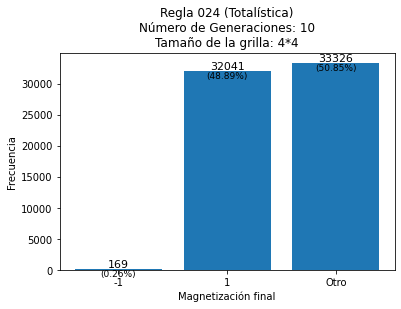

In [106]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [107]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [108]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [109]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,72,0,48,0.6,0.6
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,16,0,1804,0.008791,0.008791
5,-0.375,4368,0,0,4368,0.0,0.0
6,-0.25,8008,0,576,7432,0.071928,0.0
7,-0.125,11440,0,2976,8464,0.26014,0.0
8,0.0,12870,0,6532,6338,0.507537,0.507537
9,0.125,11440,0,8288,3152,0.724476,0.724476


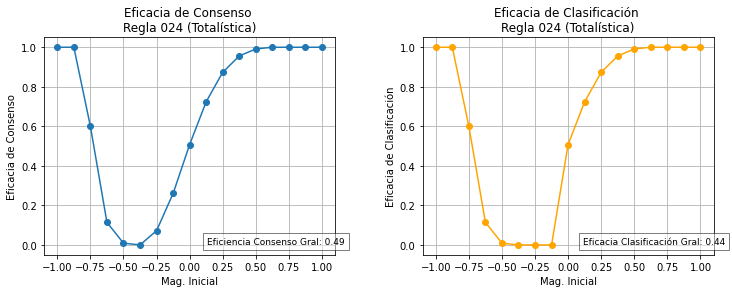

In [110]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 024 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 024 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## H. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -24 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 4] entonces 1.
- E.O.C. entonces -1.

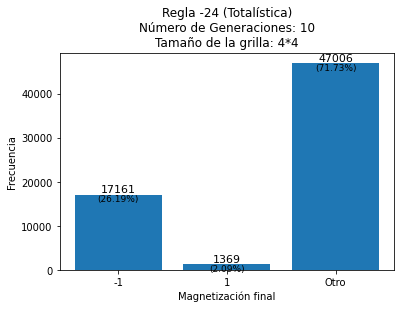

In [111]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -24 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [112]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [113]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [114]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,48,0,72,0.4,0.4
3,-0.625,560,0,0,560,0.0,0.0
4,-0.5,1820,684,16,1120,0.384615,0.375824
5,-0.375,4368,48,0,4320,0.010989,0.010989
6,-0.25,8008,2648,0,5360,0.330669,0.330669
7,-0.125,11440,1152,256,10032,0.123077,0.100699
8,0.0,12870,4260,0,8610,0.331002,0.0
9,0.125,11440,2592,0,8848,0.226573,0.0


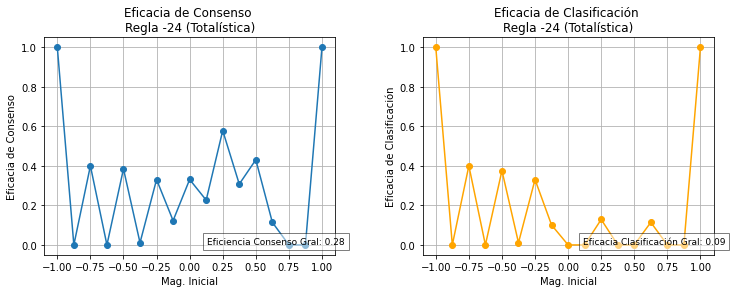

In [115]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -24 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -24 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## I. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -224 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 2, 4] entonces 1.
- E.O.C. entonces -1.

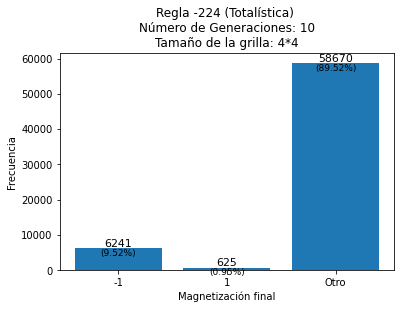

In [116]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -224 (Totalística) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [117]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [118]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [119]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,48,0,72,0.4,0.4
3,-0.625,560,0,0,560,0.0,0.0
4,-0.5,1820,684,16,1120,0.384615,0.375824
5,-0.375,4368,0,0,4368,0.0,0.0
6,-0.25,8008,2592,64,5352,0.331668,0.323676
7,-0.125,11440,0,0,11440,0.0,0.0
8,0.0,12870,2916,96,9858,0.234033,0.007459
9,0.125,11440,0,64,11376,0.005594,0.005594


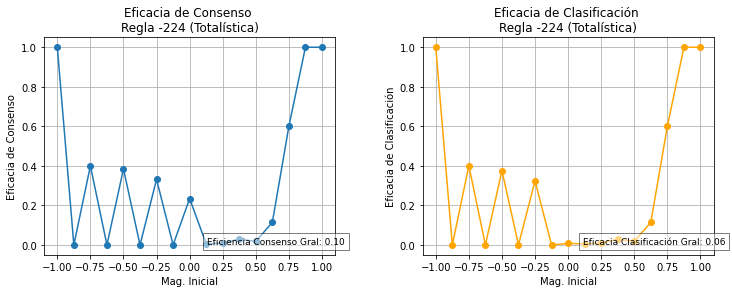

In [120]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -224 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -224 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## J. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -204 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 0, 4] entonces 1.
- E.O.C. entonces -1.

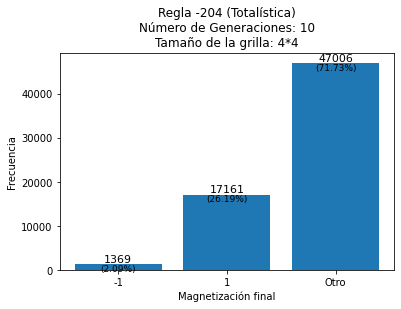

In [121]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 0 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -204 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [122]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [123]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [124]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,0,0,120,0.0,0.0
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,0,784,1036,0.430769,0.0
5,-0.375,4368,0,1344,3024,0.307692,0.0
6,-0.25,8008,1032,3600,3376,0.578422,0.128871
7,-0.125,11440,0,2592,8848,0.226573,0.0
8,0.0,12870,0,4260,8610,0.331002,0.331002
9,0.125,11440,256,1152,10032,0.123077,0.100699


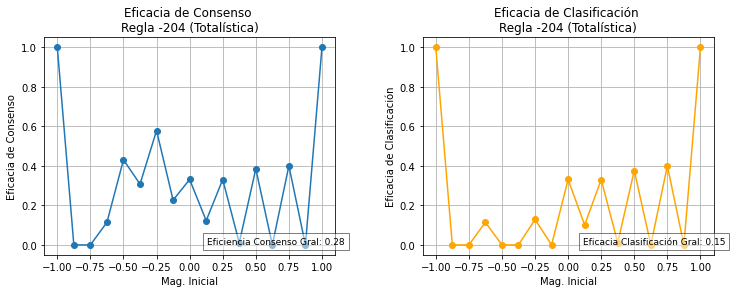

In [125]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -204 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -204 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## K. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -2024 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 0, 2, 4] entonces 1.
- E.O.C. entonces -1.

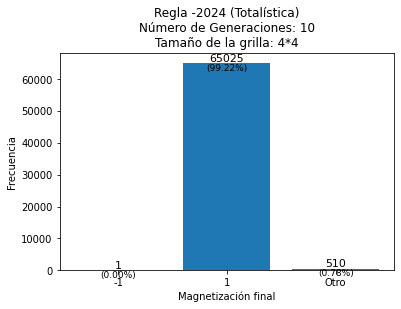

In [126]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -2024 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [127]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [128]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [129]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,0,64,56,0.533333,0.0
3,-0.625,560,0,448,112,0.8,0.0
4,-0.5,1820,0,1680,140,0.923077,0.0
5,-0.375,4368,0,4256,112,0.974359,0.0
6,-0.25,8008,0,7952,56,0.993007,0.0
7,-0.125,11440,0,11424,16,0.998601,0.0
8,0.0,12870,0,12868,2,0.999845,0.999845
9,0.125,11440,0,11440,0,1.0,1.0


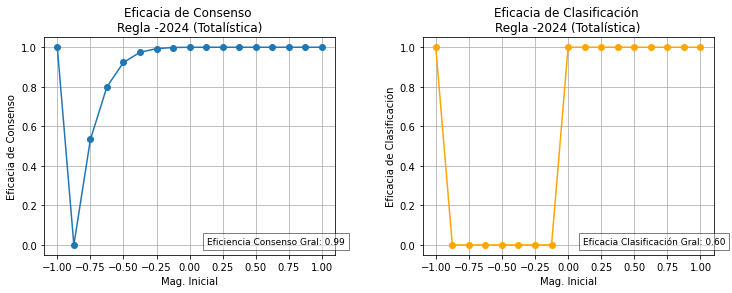

In [130]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -2024 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -2024 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______